# Clasificador de imágenes

En este notebook se propone el desarrollo de un clasificador de imágenes para productos. Para llevar a cabo este estudio, se utilizó el [E-commerce Products Image Dataset](https://www.kaggle.com/datasets/sunnykusawa/ecommerce-products-image-dataset/data), un conjunto de datos que contiene imágenes organizadas en cuatro categorías principales: televisores, sofás, camisetas y jeans. Cada una de estas categorías cuenta con 199 imágenes, lo que proporciona un volumen de datos equilibrado y suficiente para abordar el problema de clasificación de imágenes en el contexto del comercio electrónico. Este dataset permite explorar y aplicar técnicas de aprendizaje automático para distinguir entre las diferentes categorías de productos, lo que resulta especialmente útil en aplicaciones como la organización automática de catálogos o la mejora de sistemas de recomendación.

In [1]:
#Importamos las librerías
import os
import kagglehub
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
#Importamos los datos
path = kagglehub.dataset_download("sunnykusawa/ecommerce-products-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 40.4M/40.4M [00:01<00:00, 21.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sunnykusawa/ecommerce-products-image-dataset/versions/1


In [3]:
#Visualizamos las carpetas
base_dir = os.path.join( path, 'ecommerce products')

print(os.listdir(base_dir))


['sofa', 'tv', 'tshirt', 'jeans']


In [4]:
# Se definen las rutas de los directorios para cada categoría de imágenes:
# - 'jeans_dir' es la ruta completa al directorio que contiene imágenes de jeans.
# - 'sofa_dir' es la ruta completa al directorio que contiene imágenes de sofás.
# - 'tshirt_dir' es la ruta completa al directorio que contiene imágenes de camisetas.
# - 'tv_dir' es la ruta completa al directorio que contiene imágenes de televisores.
# Estas rutas se construyen uniendo el directorio base (`base_dir`) con el nombre de la categoría.
jeans_dir = os.path.join(base_dir, 'jeans')
sofa_dir = os.path.join(base_dir, 'sofa')
tshirt_dir = os.path.join(base_dir, 'tshirt')
tv_dir = os.path.join(base_dir, 'tv')

# Se obtienen los nombres de los archivos (imágenes) en cada directorio:
# - 'jeans_fnames' es una lista con los nombres de los archivos en el directorio 'jeans_dir'.
# - 'sofa_fnames' es una lista con los nombres de los archivos en el directorio 'sofa_dir'.
# - 'tshirt_fnames' es una lista con los nombres de los archivos en el directorio 'tshirt_dir'.
# - 'tv_fnames' es una lista con los nombres de los archivos en el directorio 'tv_dir'.
# La función `os.listdir()` devuelve una lista de los nombres de los archivos en el directorio especificado.
jeans_fnames = os.listdir(jeans_dir)
sofa_fnames = os.listdir(sofa_dir)
tshirt_fnames = os.listdir(tshirt_dir)
tv_fnames = os.listdir(tv_dir)

# Se imprime el número de imágenes en cada categoría:
# - `len(jeans_fnames)` devuelve el número de archivos en la lista 'jeans_fnames'.
# - `len(sofa_fnames)` devuelve el número de archivos en la lista 'sofa_fnames'.
# - `len(tshirt_fnames)` devuelve el número de archivos en la lista 'tshirt_fnames'.
# - `len(tv_fnames)` devuelve el número de archivos en la lista 'tv_fnames'.
# Esto es útil para verificar cuántas imágenes hay en cada categoría.
print("count jeans :", len(jeans_fnames))
print("count sofa :", len(sofa_fnames))
print("count tshirt :", len(tshirt_fnames))
print("count tv :", len(tv_fnames))

count jeans : 199
count sofa : 199
count tshirt : 199
count tv : 199


In [5]:
# Definimos el número de filas y columnas que tendrá la cuadrícula de imágenes
nrows = 4
ncols = 8

# Inicializamos el índice de la imagen en 0
pic_index = 0

# Obtenemos la figura actual (gcf significa "get current figure") y establecemos su tamaño
# El tamaño se define en pulgadas, multiplicando el número de columnas y filas por 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Incrementamos el índice de la imagen en 8 para mostrar las siguientes 8 imágenes
pic_index += 8

# Generamos una lista de rutas de imágenes para cada categoría (jeans, sofa, tshirt, tv)
# Las rutas se construyen uniendo el directorio correspondiente con los nombres de archivo
# Se seleccionan los nombres de archivo desde `pic_index-8` hasta `pic_index`
next_jeans_pix = [os.path.join(jeans_dir, fname)
                for fname in jeans_fnames[pic_index-8:pic_index]
               ]

next_sofa_pix = [os.path.join(sofa_dir, fname)
                for fname in sofa_fnames[pic_index-8:pic_index]
               ]

next_tshirt_pix = [os.path.join(tshirt_dir, fname)
                for fname in tshirt_fnames[pic_index-8:pic_index]
               ]

next_tv_pix = [os.path.join(tv_dir, fname)
                for fname in tv_fnames[pic_index-8:pic_index]
               ]

# Iteramos sobre todas las rutas de imágenes combinadas (jeans, sofa, tshirt, tv)
for i, img_path in enumerate(next_jeans_pix + next_sofa_pix + next_tshirt_pix + next_tv_pix):
  # Configuramos un subplot (subgráfico) en la posición i+1 (los índices comienzan en 1)
  sp = plt.subplot(nrows, ncols, i + 1)

  # Desactivamos los ejes para que no se muestren en la imagen
  sp.axis('Off')

  # Leemos la imagen desde la ruta especificada
  img = mpimg.imread(img_path)

  # Mostramos la imagen en el subplot actual
  plt.imshow(img)

# Finalmente, mostramos la figura con todas las imágenes en la cuadrícula
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Red Preentrenada

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Configuración de directorios y parámetros
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 4

# Crear generador de datos con menos augmentation para reducir procesamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

# Crear los generadores
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Cargar MobileNetV2 con pesos de ImageNet
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    alpha=0.75  # Reduce el número de canales para hacer el modelo más ligero
)

# Congelar el modelo base
base_model.trainable = False

# Crear el modelo con menos capas
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilar con optimizador más ligero
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar con menos épocas
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

# Opcional: Convertir a TFLite para reducir aún más el tamaño
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Guardar el modelo TFLite
with open('modelo_clasificacion_lite.tflite', 'wb') as f:
    f.write(tflite_model)

# También guardar el modelo normal por si lo necesitas
model.save('modelo_clasificacion.h5')

# Imprimir el tamaño del modelo
print(f"Tamaño del modelo TFLite: {len(tflite_model) / 1024 / 1024:.2f} MB")

Found 640 images belonging to 4 classes.
Found 156 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 790ms/step - accuracy: 0.5108 - loss: 1.1293 - val_accuracy: 0.9766 - val_loss: 0.2264
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 601ms/step - accuracy: 0.9506 - loss: 0.2092 - val_accuracy: 0.9688 - val_loss: 0.1205
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 598ms/step - accuracy: 0.9781 - loss: 0.1055 - val_accuracy: 0.9844 - val_loss: 0.0612
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 608ms/step - accuracy: 0.9801 - loss: 0.0835 - val_accuracy: 0.9844 - val_loss: 0.0695
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 608ms/step - accuracy: 0.9841 - loss: 0.0731 - val_accuracy: 0.9922 - val_loss: 0.0339
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 601ms/step - accuracy: 0.9905 - loss: 0.0470 - val_accuracy: 0.9766 - val_loss: 0.0800
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 611ms/step - accuracy: 0.9913 - loss: 0.0510 - val_accuracy: 0.9844 - val_loss: 0.0426
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 594ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accu

Tamaño del modelo TFLite: 1.52 MB


In [17]:
#cargamos el modelo
model = load_model('modelo_clasificacion.h5')

In [20]:
# Visualizar el entrenamiento
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Graficar accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'])

    # Graficar loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()

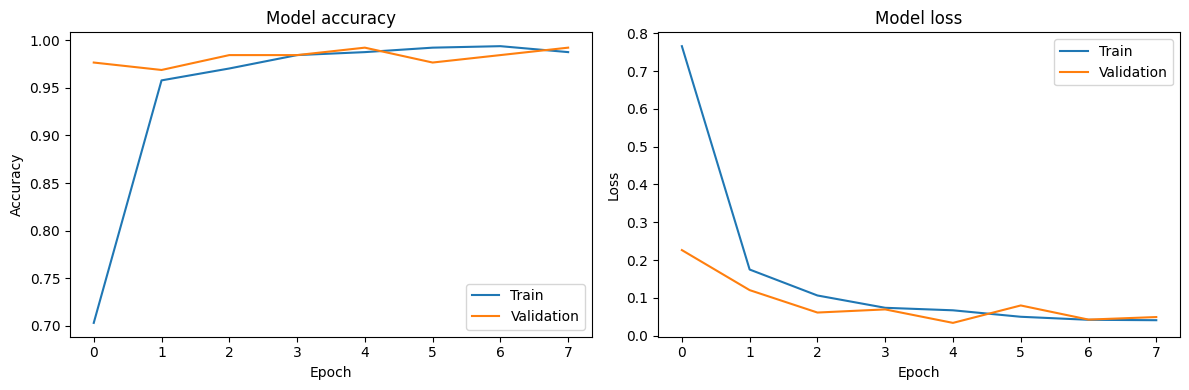

In [21]:
plot_training_history(history)

In [9]:
def create_confusion_matrix(model, test_generator, class_names):
    # Obtener predicciones
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)

    # Obtener etiquetas verdaderas
    y_true = test_generator.classes

    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Visualizar matriz de confusión
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Matriz de Confusión')
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

    # Imprimir reporte de clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=class_names))

# Crear generador para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    base_dir,  # Usa el mismo directorio que usaste para entrenar
    target_size=(224, 224),      # Mismo tamaño que usaste en el entrenamiento
    batch_size=1,                # Batch size de 1 para evaluación
    class_mode='categorical',
    shuffle=False                # Importante: no mezclar para mantener el orden correcto
)

# Nombres de las clases
class_names = ['jeans', 'sofa', 'tshirt', 'tv']

Found 796 images belonging to 4 classes.


796/796 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step


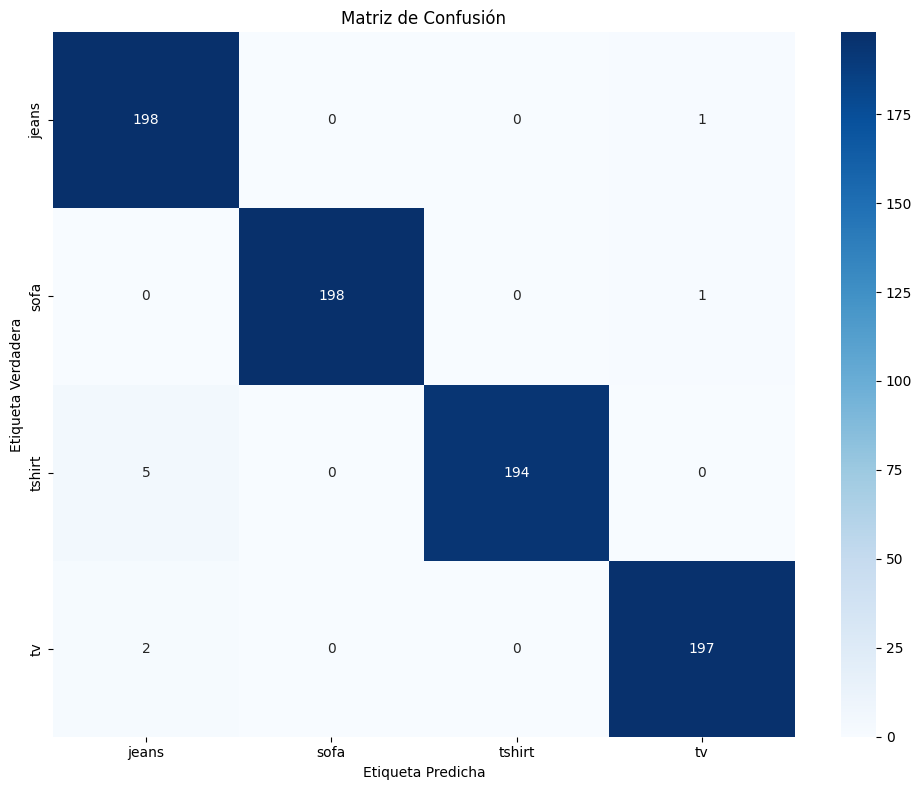


Reporte de Clasificación:
              precision    recall  f1-score   support

       jeans       0.97      0.99      0.98       199
        sofa       1.00      0.99      1.00       199
      tshirt       1.00      0.97      0.99       199
          tv       0.99      0.99      0.99       199

    accuracy                           0.99       796
   macro avg       0.99      0.99      0.99       796
weighted avg       0.99      0.99      0.99       796



In [22]:

# Crear y mostrar la matriz de confusión
create_confusion_matrix(model, test_generator, class_names)

In [10]:

# Definir la función para preprocesar la imagen y hacer la predicción
def predecir_clase_imagen(img_path, img_height=224, img_width=224):
    """
    Función para preprocesar una imagen y predecir su clase usando el modelo.

    Parámetros:
    - img_path: Ruta de la imagen a predecir.
    - img_height: Altura de la imagen (por defecto 224).
    - img_width: Ancho de la imagen (por defecto 224).

    Retorna:
    - clase_predicha: La clase predicha por el modelo.
    - probabilidades: Las probabilidades de cada clase.
    """
    # Cargar la imagen y redimensionarla
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión del batch
    img_array /= 255.0  # Normalizar la imagen

    # Hacer la predicción
    predicciones = model.predict(img_array)
    clase_predicha = np.argmax(predicciones, axis=1)
    probabilidades = predicciones[0]

    # Obtener el nombre de la clase predicha usando class_names
    clase_predicha = class_names[clase_predicha[0]]

    return clase_predicha, probabilidades


In [11]:
image_path1 = 'tshirt.jpg'
image_path2 = 'URBAN-2.png'

(-0.5, 2125.5, 1416.5, -0.5)

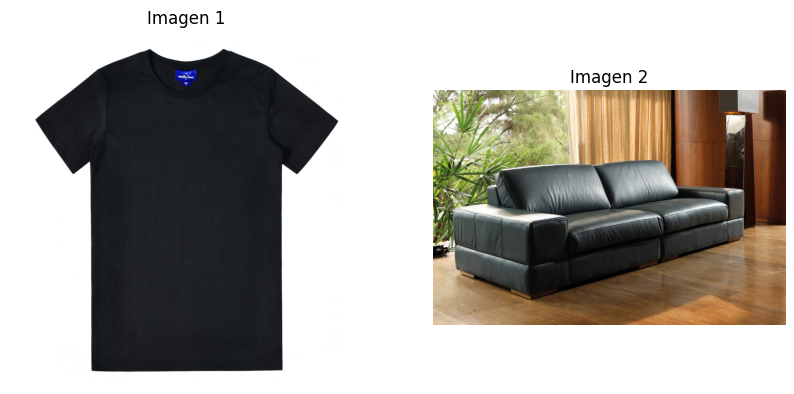

In [12]:
#Mostramos las imagenes
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Imagen 2')
plt.axis('off')

In [13]:
# Ejemplo de uso de la función

predicted_class1, probabilities1 = predecir_clase_imagen(image_path1)
print(f"Imagen 1: Clase predicha: {predicted_class1}, Probabilidades: {probabilities1}")

predicted_class2, probabilities2 = predecir_clase_imagen(image_path2)
print(f"Imagen 2: Clase predicha: {predicted_class2}, Probabilidades: {probabilities2}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Imagen 1: Clase predicha: tshirt, Probabilidades: [3.5524326e-03 3.6279520e-04 9.9484706e-01 1.2377163e-03]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Imagen 2: Clase predicha: sofa, Probabilidades: [0.01224648 0.95332956 0.0044403  0.02998363]


##Planteamiento del modelo

Found 640 images belonging to 4 classes.
Found 156 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 965ms/step - accuracy: 0.3066 - loss: 1.5286 - val_accuracy: 0.6875 - val_loss: 0.9390
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 989ms/step - accuracy: 0.6370 - loss: 0.9699 - val_accuracy: 0.7578 - val_loss: 0.6384
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 612ms/step - accuracy: 0.7234 - loss: 0.7226 - val_accuracy: 0.7422 - val_loss: 0.5925
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 608ms/step - accuracy: 0.7683 - loss: 0.6575 - val_accuracy: 0.8359 - val_loss: 0.5073
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 613ms/step - accuracy: 0.7777 - loss: 0.6200 - val_accuracy: 0.8281 - val_loss: 0.5717
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 610ms/step - accuracy: 0.7727 - loss: 0.6520 - val_accuracy: 0.8203 - val_loss: 0.5091
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 641ms/step - accuracy: 0.8232 - loss: 0.5064 - val_accuracy: 0.9062 - val_loss: 0.3575
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 613ms/step - accuracy: 0.7782 - loss: 0.5538 - val_accu

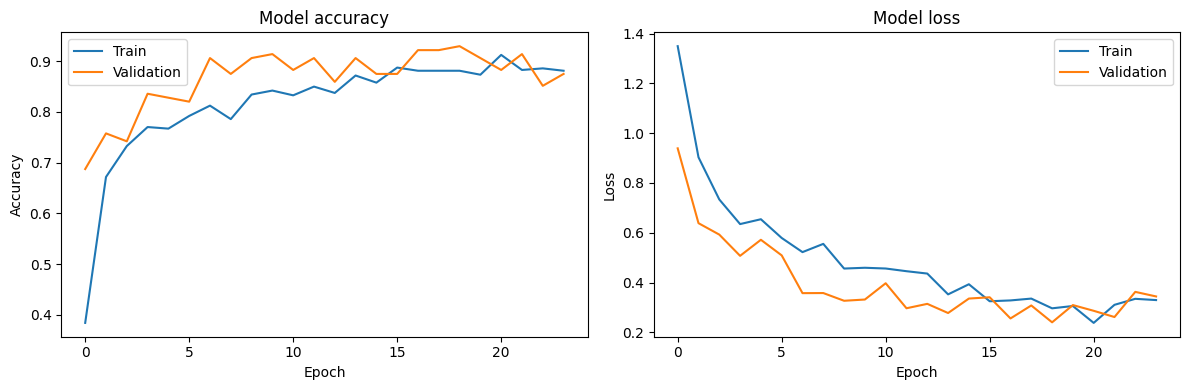

In [23]:

# Configuración de directorios y parámetros
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 4

# Crear generadores de datos con augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # 20% para validación
)

# Crear los generadores de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    base_dir,  # Directorio que contiene las carpetas de clases
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Crear el modelo CNN
model = Sequential([
    # Primera capa convolucional
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    # Segunda capa convolucional
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Tercera capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten y capas densas
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)


plot_training_history(history)

# # Guardar el modelo
# model.save('modelo_clasificacion.h5')

El modelo alcanza una precisión superior al 93% en el conjunto de entrenamiento y 92% en validación, lo que indica un buen aprendizaje sin una brecha significativa entre ambos conjuntos.
La curva de pérdida (loss) muestra una disminución constante sin signos evidentes de sobreajuste, aunque algunas oscilaciones en la validación podrían mejorarse con regularización o ajuste de hiperparámetros

796/796 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


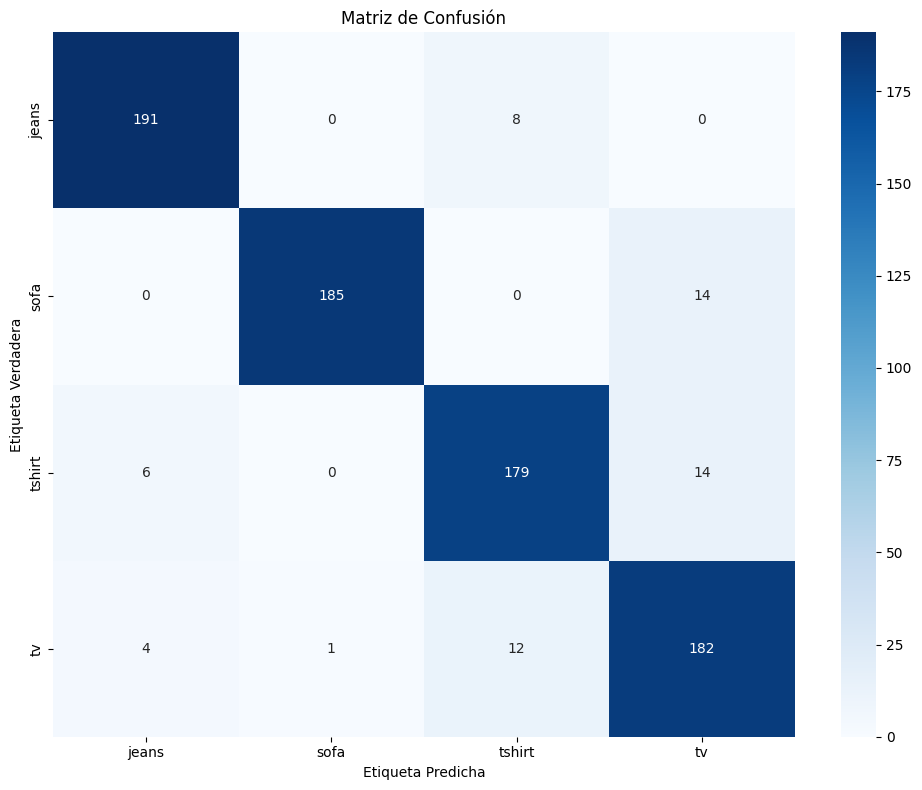


Reporte de Clasificación:
              precision    recall  f1-score   support

       jeans       0.95      0.96      0.95       199
        sofa       0.99      0.93      0.96       199
      tshirt       0.90      0.90      0.90       199
          tv       0.87      0.91      0.89       199

    accuracy                           0.93       796
   macro avg       0.93      0.93      0.93       796
weighted avg       0.93      0.93      0.93       796



In [24]:

# Crear y mostrar la matriz de confusión
create_confusion_matrix(model, test_generator, class_names)

La matriz de confusión muestra que la mayoría de las predicciones son correctas, con pocos errores.
Se observa cierta confusión en la categoría sofa, donde 28 muestras fueron clasificadas erróneamente como tv, lo que sugiere que estas clases pueden compartir características visuales que llevan al modelo a confundirse.

In [ ]:
#Cargamos el modelo
model = load_model('modelo_clasificacion.h5')

Creamos una función para preprocesar la imagen y hacer la preducción.

In [ ]:
image_path1 = 'tshirt.jpg'
image_path2 = 'URBAN-2.png'

(-0.5, 2125.5, 1416.5, -0.5)

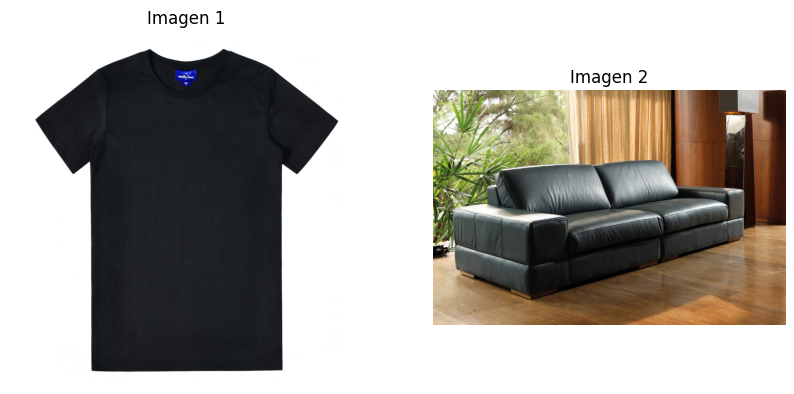

In [25]:
#Mostramos las imagenes
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Imagen 2')
plt.axis('off')

In [27]:
# Ejemplo de uso de la función

predicted_class1, probabilities1 = predecir_clase_imagen(image_path1)
print(f"Imagen 1: Clase predicha: {predicted_class1}, Probabilidades: {probabilities1}")

predicted_class2, probabilities2 = predecir_clase_imagen(image_path2)
print(f"Imagen 2: Clase predicha: {predicted_class2}, Probabilidades: {probabilities2}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Imagen 1: Clase predicha: tshirt, Probabilidades: [1.2527408e-02 2.4423693e-04 9.8058778e-01 6.6405311e-03]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Imagen 2: Clase predicha: tv, Probabilidades: [8.9357828e-04 9.2176172e-10 1.3302120e-04 9.9897337e-01]
